<a href="https://colab.research.google.com/github/dj-trixs/Cluster-s/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Summary statement

The purpose of this analysis is to understand mobile app download behaviors and the associated consumer patterns by segmenting users using unsupervised machine learning techniques. The dataset contains survey responses from mobile app users, covering a broad spectrum of questions about app usage, preferences, and demographics. By analyzing the data, the analysis was aimed at identifying distinct user segments that can inform targeted marketing strategies. Segmentation is important for the marketing team because it will help with better improved promotional campaigns, broader user engagement, and boost app downloads. The analysis involves processes such as exploratory data analysis (EDA), data preparation, clustering using K-Means, and visualization of the results. In addition to the cluster analysis I thought about implementing Principal Component Analysis (PCA) to reduce spacing and improve clustering performance.

By differentiating users and implementing strategic marketing ideas powered with data, the experiment aims to craft personalized messages that resonate with specific user segments, tailor the app experience to address the unique needs of each user group, and focus marketing efforts on user segments with the highest download potential. This detailed approach not only enhances marketing efforts but also greatly improves the overall user experience, providing actionable insights that drive marketing decisions. Ultimately, the goal is to improve user retention, attract new users, and optimize business outcomes.


### Key insights
Several insights stood out, including segmentation based on app usage, demographics, feedback and reviews, user engagement, and personalized user experience (UI/UX).

Brief on Each Insight

1. Segmentation-  The analysis revealed that each segment had different ways of using and downloading the app.
   
2. Demographics- This insight focuses on the audience that uses the app, such as identifying younger users, gender differences, and regional preferences or engagement levels with the app.

3. Categories with User Engagement -  Social media and entertainment platforms showed higher engagement compared to other apps.

4. Feedback & Reviews - Positive reviews were correlated with an increase in downloads, while negative reviews led to a drop in ratings and a reduction in downloads.

5. User Experience and Personalization- Users appreciate customized content and recommendations based on their views and engagement with the app.


### Recommendations

Segmentation on App Usage

Develop a loyalty program for frequent users, offering incentives like exclusive offers and better customization for recommended features. Regularly alert these users about new features within the app. For intermediate users, notify them about discounts and benefits through short ads. To increase engagement, implement a treasure hunt within the app for unlocking certain features. Simplify the user experience and provide short tutorials or interactive guides to help users navigate new features.

Demographics

Create age-appropriate content and collaborate with both upcoming and popular influencers for different age groups. Utilize platforms like Instagram, TikTok, and YouTube for younger audiences, while including Snapchat, Facebook, and LinkedIn for older users. Develop content tailored to each age group and continuously track and analyze campaign performance to refine strategies.

 Categories with User Engagement

Promote the most engaging app categories prominently in marketing campaigns and app store listings. Feature top-performing apps in newsletters and on social media. Use in-app recommendations to highlight popular categories, ensuring users are aware of and engaged with the most compelling content.

Feedback & Reviews

Establishing a feedback loop to monitor and address user reviews promptly. Encourage satisfied users to leave positive reviews through in-app prompts and incentives. Actively respond to negative reviews with solutions and updates, demonstrating a commitment to user satisfaction and improving the app's reputation.

User Experience and Personalization

Implement algorithms to provide custom or personalized apps recommendations based on user behavior and preferences. Allow users to customize their app interface with options like themes and layout adjustments. Use behavioral insights to deliver targeted content and notifications, enhancing the overall user experience and engagement.

By these recommendations, the marketing department can effectively gain more traction with the campagnes and will be able to understand a need for improvement in any area from strategises listed

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Accessing  file path for import
mas_data = pd.read_excel('./datasets/Mobile_App_Survey_Data.xlsx')

# 5 Rows print from  the dataset marked as mas_data
mas_data.head()

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,...,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,355,5,0,1,1,0,0,0,0,0,...,1,0,0,0,1,0,1,2,11,1
1,1397,3,0,0,1,0,0,0,0,0,...,2,1,0,0,0,0,2,2,9,2
2,1197,2,0,1,1,0,0,0,0,0,...,2,1,0,0,0,0,1,2,8,2
3,484,2,0,0,0,0,1,0,0,0,...,2,1,0,0,0,0,2,2,1,1
4,2113,4,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,2,11,2


# EDA & DP

<Figure size 1500x1000 with 0 Axes>

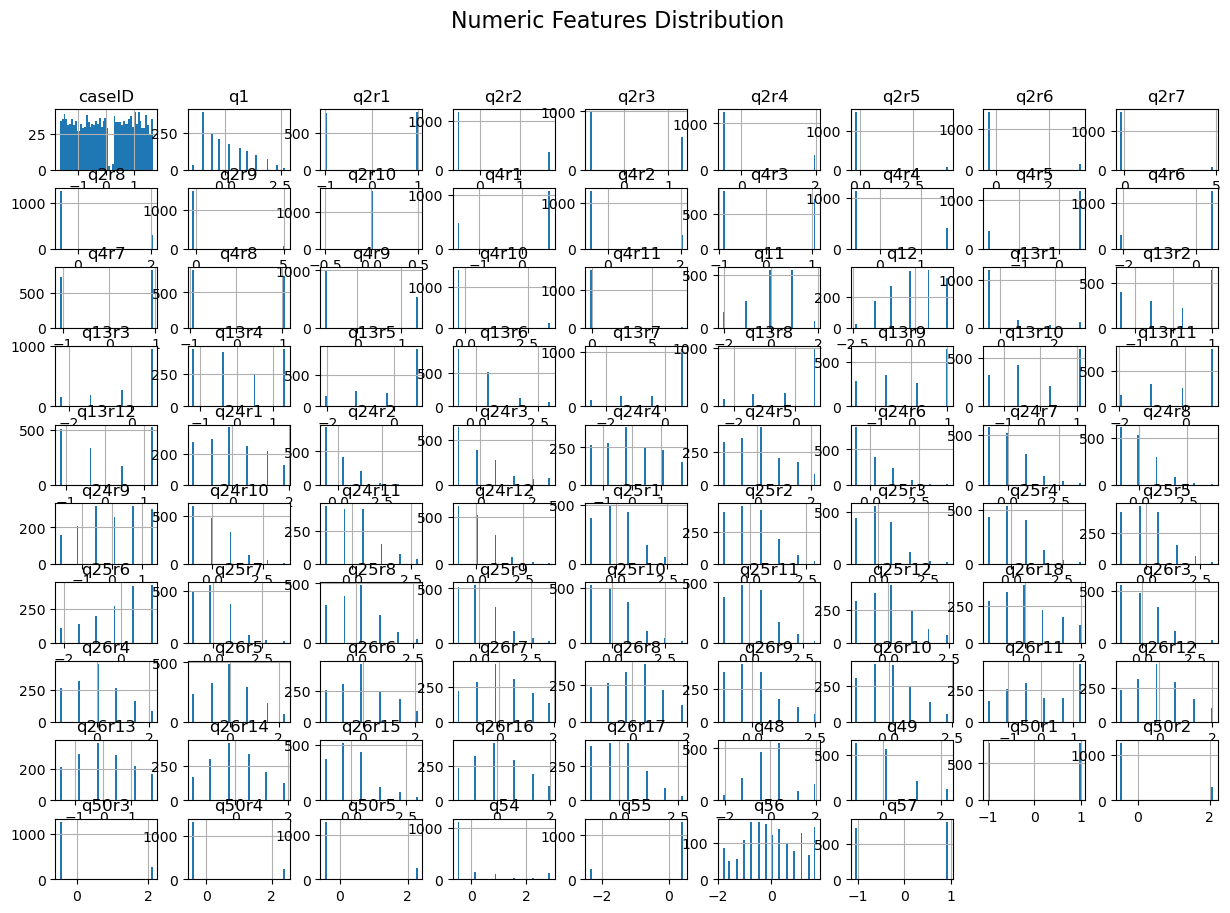

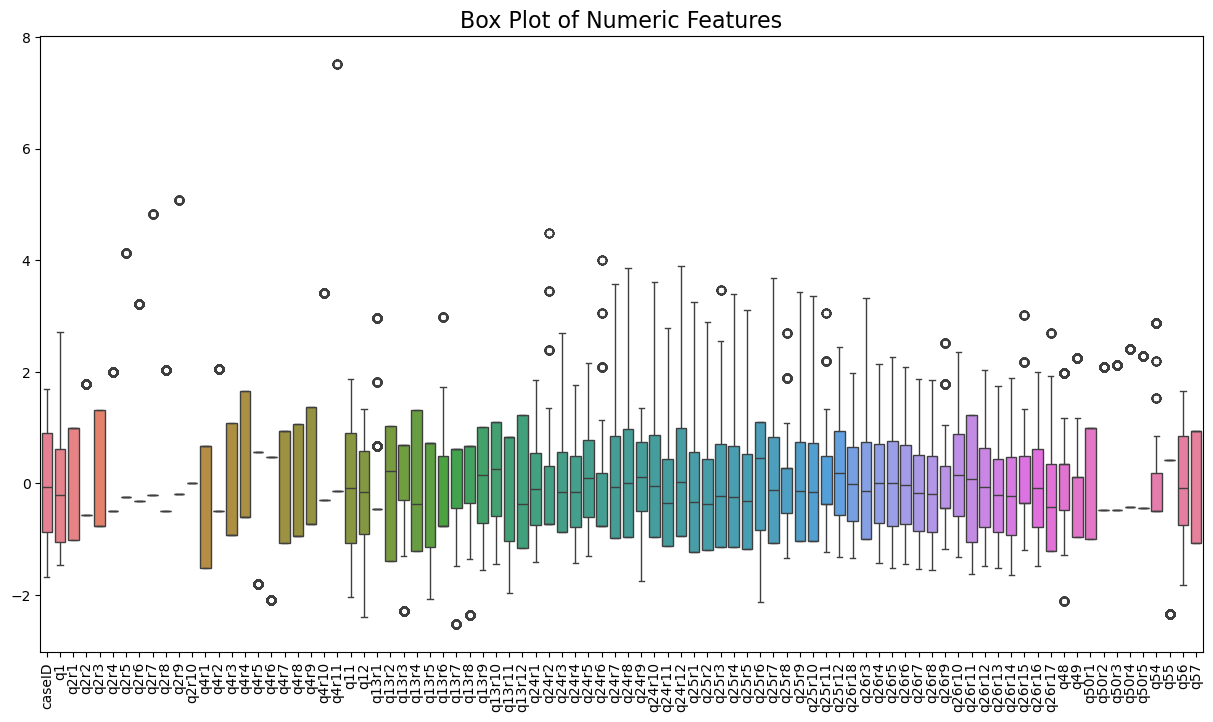

Missing values:
 caseID    0
q1        0
q2r1      0
q2r2      0
q2r3      0
         ..
q50r5     0
q54       0
q55       0
q56       0
q57       0
Length: 88, dtype: int64

Defining statistics:
             caseID           q1         q2r1         q2r2         q2r3  \
count  1552.000000  1552.000000  1552.000000  1552.000000  1552.000000   
mean   1192.854381     4.506443     0.503222     0.240979     0.364046   
std     712.006709     2.400829     0.500151     0.427816     0.481317   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%     570.750000     2.000000     0.000000     0.000000     0.000000   
50%    1144.500000     4.000000     1.000000     0.000000     0.000000   
75%    1833.500000     6.000000     1.000000     0.000000     1.000000   
max    2396.000000    11.000000     1.000000     1.000000     1.000000   

              q2r4         q2r5         q2r6         q2r7         q2r8  ...  \
count  1552.000000  1552.000000  1552.000000  1552.000000

In [ ]:
# Missing values inspection
missing_values = mas_data.isnull().sum()

# Drop any missing values
mas_data_cleared = mas_data.dropna()

# Defining statistics
defining_stats = mas_data_cleared.describe()

# Standardized numerical features
scaler = StandardScaler()
numerical_features = mas_data_cleared.select_dtypes(include=['float64',
                                                             'int64']).columns
mas_data_cleared[numerical_features] = scaler.fit_transform(
                                        mas_data_cleared[numerical_features])

# Combined histogram for numerical features
plt.figure(figsize=(15, 10))
mas_data_cleared[numerical_features].hist(bins=50, figsize=(15, 10))
plt.suptitle('Numeric Features Distribution', fontsize=16)
plt.show()

# Summary -  box plot for numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=mas_data_cleared[numerical_features])
plt.xticks(rotation=90)
plt.title('Box Plot of Numeric Features', fontsize=16)
plt.show()



# Outputs to display
print("Missing values:\n", missing_values)
print("\nDefining statistics:\n", defining_stats)

### Missing values
#### -

### Dropping unnecessary columns

### Descriptive numerical feature

### Standardize numerical features

### Combined  histogram

# Using the Elbow Method to determine the number of clusters

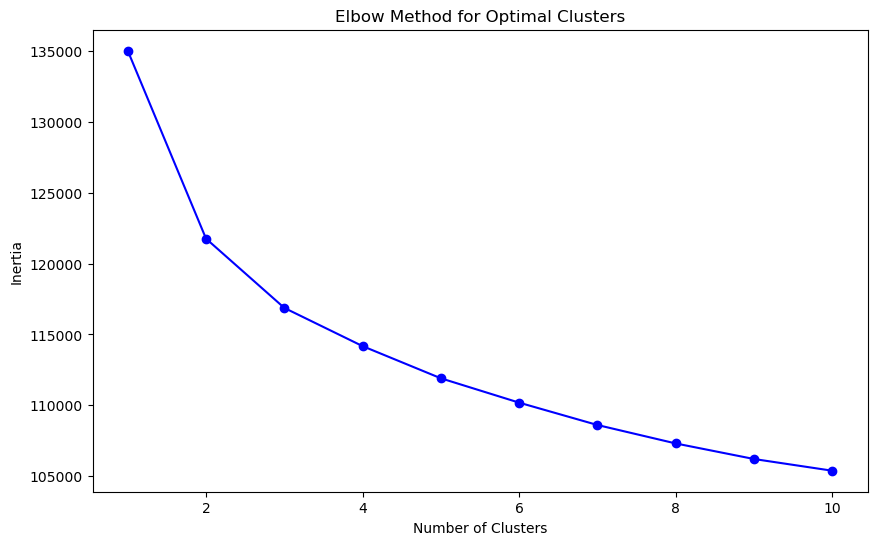

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(mas_data_cleared[numerical_features])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


## What was deduced from the Elbow plot ?

In [ ]:
# Focusing on 3 clusters based on the Elbow Method
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(mas_data_cleared[numerical_features])

# Adding cluster labels to the data
mas_data_cleared['Cluster'] = clusters #- This is used to assign each data points a label

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(mas_data_cleared[numerical_features],
                                  clusters)
print(f'Silhouette Score: {silhouette_avg}')

# A summary of the characteristics of each cluster
cluster_summary = mas_data_cleared.groupby('Cluster').mean()
print(cluster_summary)


Silhouette Score: 0.05621985814037492
           caseID        q1      q2r1      q2r2      q2r3      q2r4      q2r5  \
Cluster                                                                         
0        0.304111  0.130113  0.203071 -0.035365 -0.077213 -0.179052 -0.177257   
1       -0.310842  0.084186 -0.292164 -0.202347 -0.006323  0.023439 -0.039690   
2       -0.120916 -0.363364  0.040649  0.356279  0.153019  0.300168  0.387406   

             q2r6      q2r7      q2r8  ...       q49     q50r1     q50r2  \
Cluster                                ...                                 
0       -0.201168 -0.170026  0.043128  ...  0.000817  0.059633 -0.081380   
1        0.008673 -0.013212 -0.251271  ...  0.042825 -0.082370 -0.032024   
2        0.362586  0.335932  0.280147  ... -0.062973  0.007022  0.197665   

            q50r3     q50r4     q50r5       q54       q55       q56       q57  
Cluster                                                                        
0       -0.0495

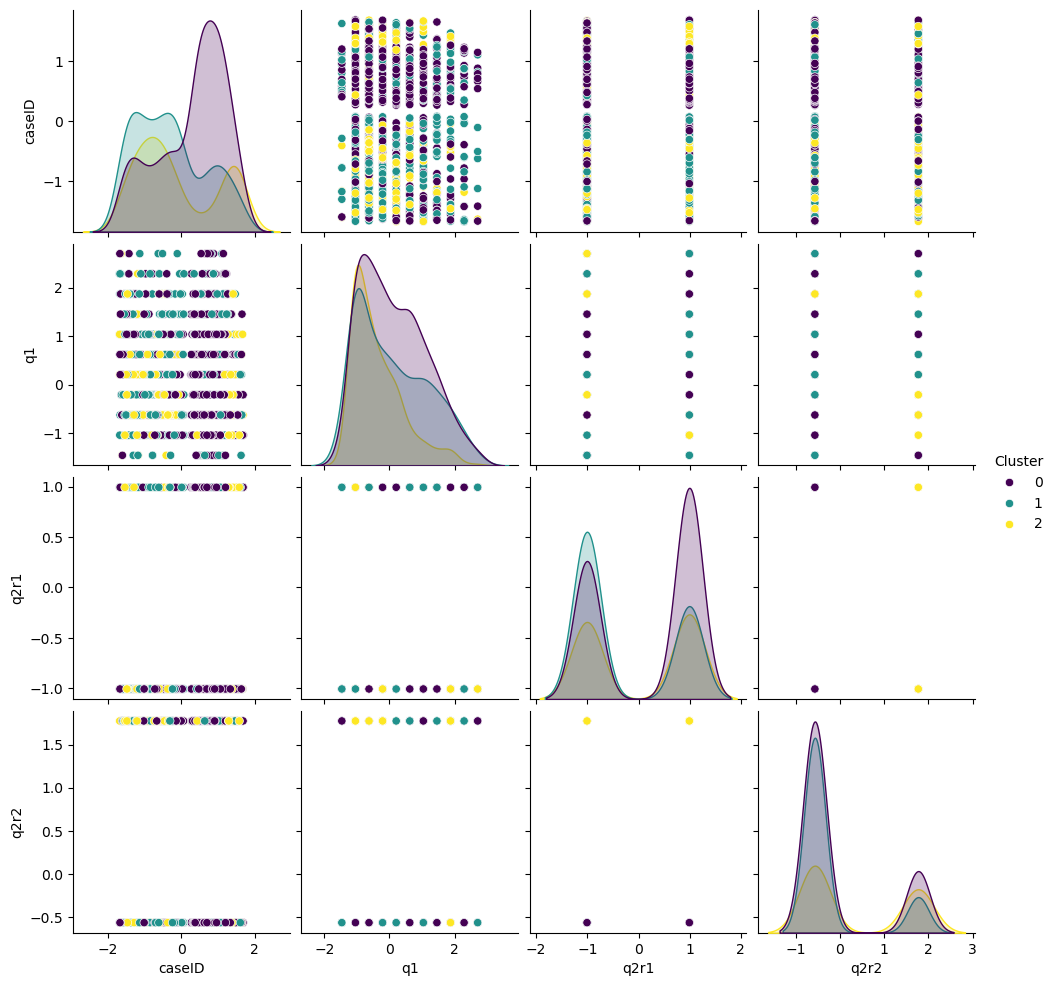

Missing Values:
 caseID    0
q1        0
q2r1      0
q2r2      0
q2r3      0
         ..
q50r5     0
q54       0
q55       0
q56       0
q57       0
Length: 88, dtype: int64

Defining Statistics:
             caseID           q1         q2r1         q2r2         q2r3  \
count  1552.000000  1552.000000  1552.000000  1552.000000  1552.000000   
mean   1192.854381     4.506443     0.503222     0.240979     0.364046   
std     712.006709     2.400829     0.500151     0.427816     0.481317   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%     570.750000     2.000000     0.000000     0.000000     0.000000   
50%    1144.500000     4.000000     1.000000     0.000000     0.000000   
75%    1833.500000     6.000000     1.000000     0.000000     1.000000   
max    2396.000000    11.000000     1.000000     1.000000     1.000000   

              q2r4         q2r5         q2r6         q2r7         q2r8  ...  \
count  1552.000000  1552.000000  1552.000000  1552.000000

In [ ]:
# Select a subset of features for pair plot visualization
subset_features = numerical_features[:4]  # Adjust this based on the number of features you want to visualize

# Visualize the clusters using a pair plot for the subset of features
sns.pairplot(mas_data_cleared[subset_features.tolist() + ['Cluster']], hue='Cluster', palette='viridis')
plt.show()

# Outputs to display
print("Missing Values:\n", missing_values)
print("\nDefining Statistics:\n", defining_stats)

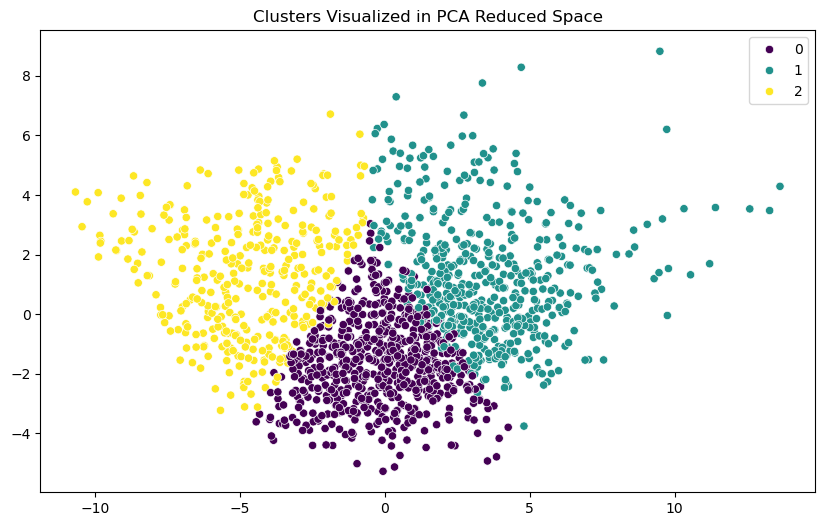

In [ ]:
# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(mas_data_cleared[numerical_features])

# Use principal components for clustering
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(principal_components)

# PCA cluster labels to the data
mas_data_cleared ['Cluster_PCA'] = clusters_pca

# Visualize clusters in PCA reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters_pca, palette='viridis')
plt.title('Clusters Visualized in PCA Reduced Space')
plt.show()

# Summarized Group Clusters for Interpretations

In [ ]:
# Summarize the characteristics of each cluster
cluster_summary = mas_data_cleared.groupby('Cluster').mean()
print(cluster_summary)


           caseID        q1      q2r1      q2r2      q2r3      q2r4      q2r5  \
Cluster                                                                         
0        0.304111  0.130113  0.203071 -0.035365 -0.077213 -0.179052 -0.177257   
1       -0.310842  0.084186 -0.292164 -0.202347 -0.006323  0.023439 -0.039690   
2       -0.120916 -0.363364  0.040649  0.356279  0.153019  0.300168  0.387406   

             q2r6      q2r7      q2r8  ...     q50r1     q50r2     q50r3  \
Cluster                                ...                                 
0       -0.201168 -0.170026  0.043128  ...  0.059633 -0.081380 -0.049590   
1        0.008673 -0.013212 -0.251271  ... -0.082370 -0.032024  0.016106   
2        0.362586  0.335932  0.280147  ...  0.007022  0.197665  0.069338   

            q50r4     q50r5       q54       q55       q56       q57  \
Cluster                                                               
0        0.019682  0.048685 -0.064838  0.084962  0.157918  0.020797   
